   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink-

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

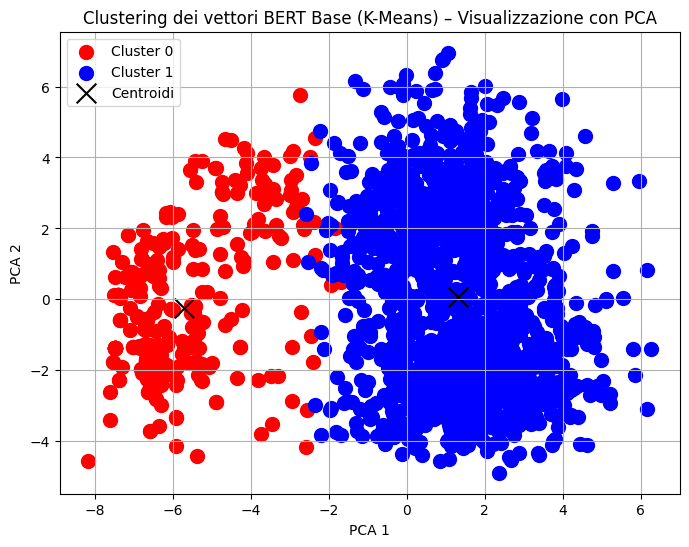

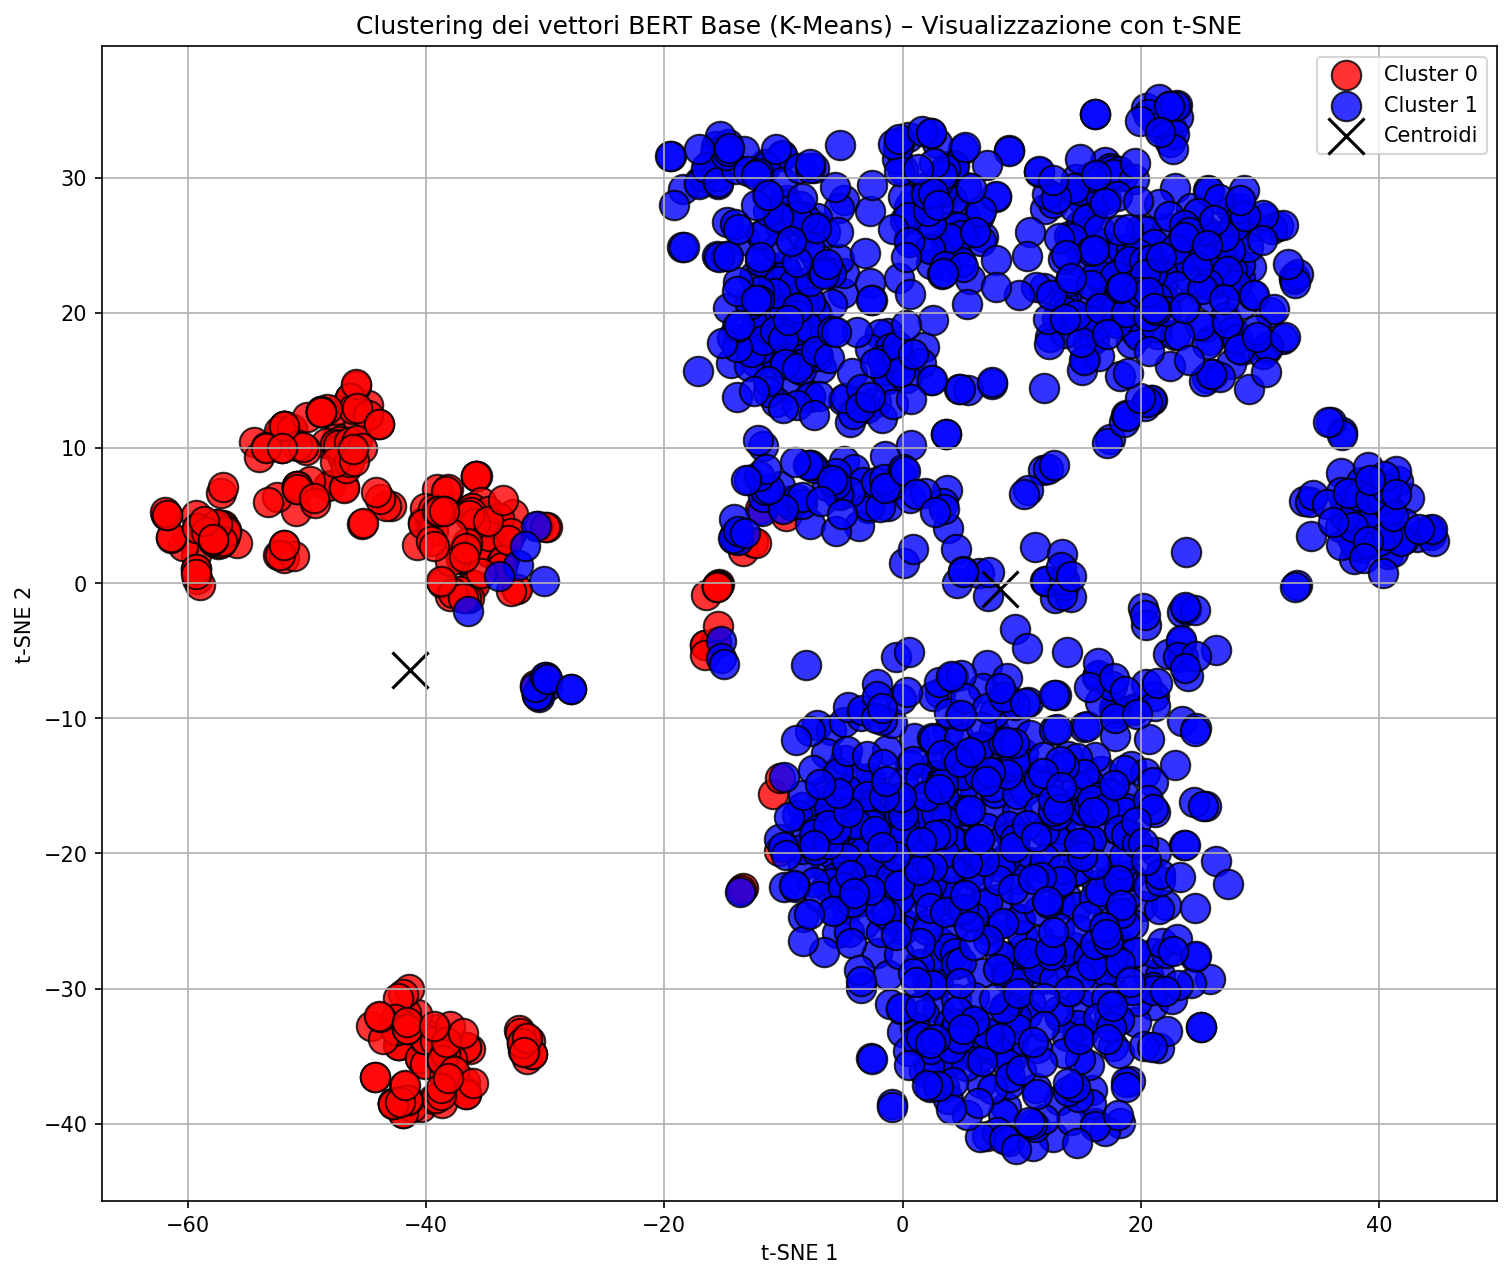


Distribuzione dei cluster:
Cluster 0: 331 elementi (18.67%)
Cluster 1: 1442 elementi (81.33%)

Schema di clustering:
Response 1: Cluster 0
Response 2: Cluster 1
Response 3: Cluster 0
Response 4: Cluster 1
Response 5: Cluster 1
Response 6: Cluster 1
Response 7: Cluster 0
Response 8: Cluster 1
Response 9: Cluster 0
Response 10: Cluster 1
Response 11: Cluster 0
Response 12: Cluster 1
Response 13: Cluster 0
Response 14: Cluster 1
Response 15: Cluster 0
Response 16: Cluster 1
Response 17: Cluster 1
Response 18: Cluster 1
Response 19: Cluster 0
Response 20: Cluster 1
Response 21: Cluster 0
Response 22: Cluster 1
Response 23: Cluster 1
Response 24: Cluster 1
Response 25: Cluster 0
Response 26: Cluster 1
Response 27: Cluster 0
Response 28: Cluster 1
Response 29: Cluster 0
Response 30: Cluster 1
Response 31: Cluster 0
Response 32: Cluster 1
Response 33: Cluster 0
Response 34: Cluster 1
Response 35: Cluster 0
Response 36: Cluster 1
Response 37: Cluster 1
Response 38: Cluster 1
Response 39: Clus

In [1]:
# Installa le librerie necessarie
!pip install transformers torch

# Importa il modello e il tokenizer BERT base da Hugging Face
from transformers import BertModel, BertTokenizer
import torch
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importa i moduli per clustering e riduzione dimensionale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ======================================================================
# BLOCCO 1: Caricamento del modello BERT base (non fine-tuned)
# ======================================================================
# Carica il modello BERT base e il tokenizer
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# ======================================================================
# BLOCCO 2: Calcolo degli embedding e salvataggio dei risultati
# ======================================================================
# Assicurati che il file "response.json" si trovi nel percorso corretto
with open("response.json", "r") as f:
    responses = json.load(f)

embedding_list = []  # Per raccogliere i vettori embedding (raw)

# Apro il file predictions.txt in modalità scrittura
with open("predictions.txt", "w") as fout:
    for idx, item in enumerate(responses):
        text = item.get("response", "")

        # Tokenizza il testo
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

        # Esegue il modello con output_hidden_states=True per ottenere gli hidden states
        with torch.no_grad():  # Non serve calcolare i gradienti
            outputs = model(**inputs, output_hidden_states=True)

        # Estrae il vettore embedding relativo al token [CLS] dall'ultimo hidden state
        embedding_vector = outputs.hidden_states[-1][:, 0, :].squeeze(0).detach().cpu().numpy()

        # Aggiunge il vettore alla lista degli embedding
        embedding_list.append(embedding_vector)

        # Scrittura su file senza stampare i vettori in console
        fout.write(f"Response {idx+1}: Embedding Vector [dimensioni: {embedding_vector.shape}]\n")

# ======================================================================
# BLOCCO 3: Clustering K-Means sui vettori embedding
# ======================================================================
# Converte la lista degli embedding in un array numpy
X = np.array(embedding_list)

# Imposta il numero di cluster (ad esempio 2)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# ======================================================================
# BLOCCO 4: Visualizzazione dei cluster
# ======================================================================
# Riduzione dimensionale a 2 componenti con PCA per la prima visualizzazione
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Lista colori per i cluster

for i in range(n_clusters):
    cluster_points = X_pca[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[i % len(colors)], label=f'Cluster {i}', s=100)

# Calcola i centroidi in spazio PCA (trasformando le posizioni dei centroidi originali)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=200,
            c='black', label='Centroidi')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering dei vettori BERT Base (K-Means) – Visualizzazione con PCA")
plt.legend()
plt.grid(True)
plt.savefig("clustering_pca.png")
plt.show()

# Visualizzazione ad alta precisione con t‑SNE
# Imposta dinamicamente il parametro perplexity in base al numero di campioni (deve essere minore di n_samples)
n_samples = X.shape[0]
perplexity_value = min(30, n_samples - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 10), dpi=150)
jitter_strength = 0.02  # Per aggiungere un lieve jitter ed evitare sovrapposizioni
np.random.seed(42)

for i in range(n_clusters):
    cluster_points = X_tsne[clusters == i]
    jitter = np.random.uniform(-jitter_strength, jitter_strength, size=cluster_points.shape)
    jittered_points = cluster_points + jitter
    plt.scatter(jittered_points[:, 0], jittered_points[:, 1],
                c=colors[i % len(colors)], label=f'Cluster {i}', s=200,
                edgecolors='k', alpha=0.8)

# Calcola il centroide t‑SNE di ciascun cluster (media delle coordinate)
centroids_tsne = np.array([X_tsne[clusters == i].mean(axis=0) for i in range(n_clusters)])
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], marker='x', s=300,
            c='black', label='Centroidi')

plt.xlabel("t‑SNE 1")
plt.ylabel("t‑SNE 2")
plt.title("Clustering dei vettori BERT Base (K-Means) – Visualizzazione con t‑SNE")
plt.legend()
plt.grid(True)
plt.savefig("clustering_tsne.png")
plt.show()

# ======================================================================
# BLOCCO 5: Stampa dei risultati del clustering senza i vettori
# ======================================================================
# Calcoliamo la distribuzione dei cluster
cluster_counts = np.bincount(clusters)
print("\nDistribuzione dei cluster:")
for i in range(n_clusters):
    print(f"Cluster {i}: {cluster_counts[i]} elementi ({(cluster_counts[i]/len(clusters))*100:.2f}%)")

# Stampiamo i risultati del clustering per ciascuna risposta (senza i vettori)
print("\nSchema di clustering:")
for idx, cluster in enumerate(clusters):
    print(f"Response {idx+1}: Cluster {cluster}")